<a href="https://colab.research.google.com/github/Jiyajiwon/080228/blob/master/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [9주차] 의사결정나무 실습


## 1) 분류
- 데이터셋: Iris 데이터
  - train/test 데이터
    - X_train, X_test
  - train/test 데이터 라벨
    - y_train, y_test: (0,1,2)

In [46]:
# Iris data 불러오기

import seaborn as sns # seaborn을 불러옴
iris = sns.load_dataset('iris') # iris라는 변수명으로 iris data를 다운로드함
X = iris.drop('species', axis=1) # 'species' 열을 drop하고 특성변수 X를 정의함
y_ = iris['species'] # 'spiecies' 열을 label y로 정의

from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) # species 열의 문자형을 범주형 값으로 전환

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

- 의사결정나무 API
  - DecisionTreeClassifier 클래스 호출
    - criterion: 불순도 알고리즘 옵션
      - default: 'gini'
      - {'entropy', 'gini'} 중 선택


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 과적합 사례 확인 법: max_depth 3=> 5=> 7 높일 수록 학습 데이터 올라가고 테스트 정확도는 안 오름

# gini, max_depth=3
dtc_gini_3 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dtc_gini_3.fit(X_train, y_train)
y_train_pred = dtc_gini_3.predict(X_train) # Training accuracy
y_test_pred = dtc_gini_3.predict(X_test) # Test accuracy
print("(train) gini   , max_depth=3: ", accuracy_score(y_train, y_train_pred))
print("(test ) gini   , max_depth=3: ", accuracy_score(y_test, y_test_pred))

# gini, max_depth=5
dtc_gini_5 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
dtc_gini_5.fit(X_train, y_train)
y_train_pred = dtc_gini_5.predict(X_train) # Training accuracy
y_test_pred = dtc_gini_5.predict(X_test) # Test accuracy
print("(train) gini   , max_depth=5: ", accuracy_score(y_train, y_train_pred))
print("(test ) gini   , max_depth=5: ", accuracy_score(y_test, y_test_pred))

# gini, max_depth=7
dtc_gini_7 = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=1)
dtc_gini_7.fit(X_train, y_train)
y_train_pred = dtc_gini_7.predict(X_train) # Training accuracy
y_test_pred = dtc_gini_7.predict(X_test) # Test accuracy
print("(train) gini   , max_depth=7: ", accuracy_score(y_train, y_train_pred))
print("(test ) gini   , max_depth=7: ", accuracy_score(y_test, y_test_pred))

# entropy, max_depth=7
dtc_entropy_7 = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)
dtc_entropy_7.fit(X_train, y_train)
y_train_pred = dtc_entropy_7.predict(X_train) # Training accuracy
y_test_pred = dtc_entropy_7.predict(X_test) # Test accuracy
print("(train) entropy, max_depth=7: ", accuracy_score(y_train, y_train_pred))
print("(test ) entropy, max_depth=7: ", accuracy_score(y_test, y_test_pred))

(train) gini   , max_depth=3:  0.9714285714285714
(test ) gini   , max_depth=3:  0.9333333333333333
(train) gini   , max_depth=5:  0.9904761904761905
(test ) gini   , max_depth=5:  0.8888888888888888
(train) gini   , max_depth=7:  1.0
(test ) gini   , max_depth=7:  0.8888888888888888
(train) entropy, max_depth=7:  1.0
(test ) entropy, max_depth=7:  0.9111111111111111


### Plot
tree.plot_tree API
- values: 각 클래스 별 데이터 수

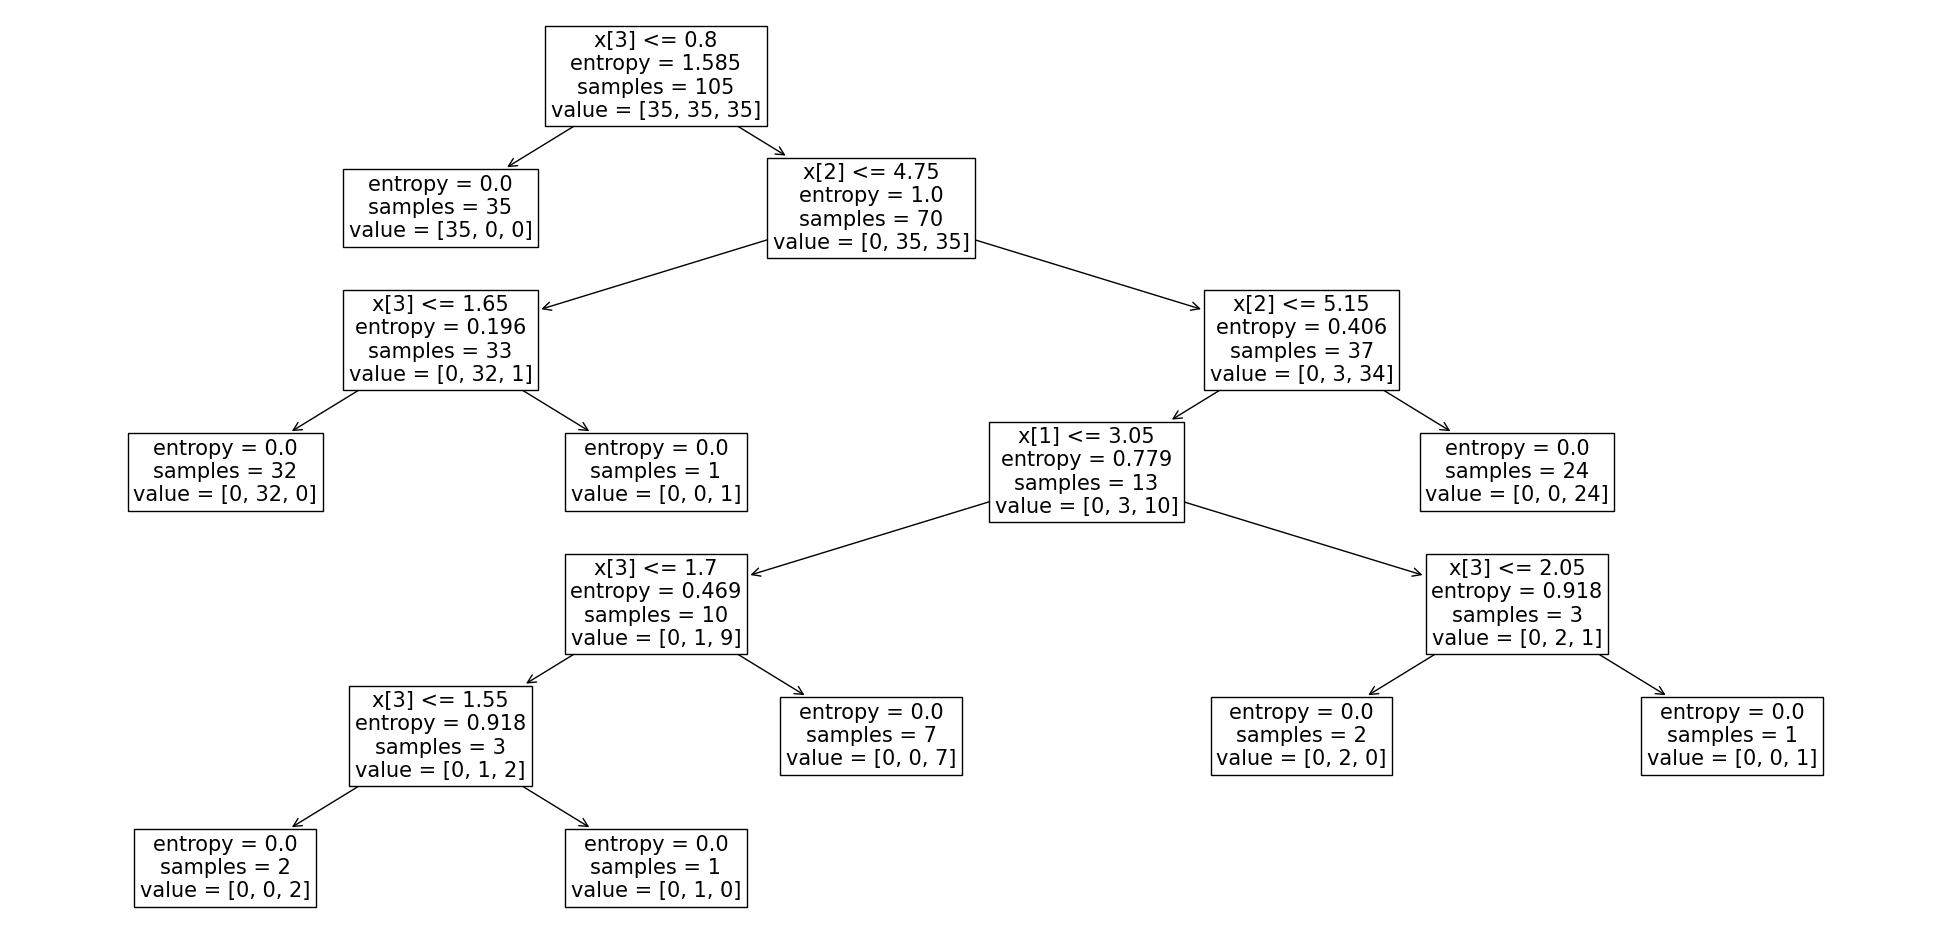

In [48]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,12))
tree.plot_tree(dtc_entropy_7.fit(X_train, y_train), fontsize=15)
plt.savefig('tree_high_dpi', dpi=100)

## 2) 회귀
- 데이터셋: 합성 데이터

In [49]:
import numpy as np
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

- 의사결정나무 API
  - DecisionTreeRegressor 클래스 호출
    - criterion: 불순도 알고리즘 옵션
      - default: 'mse'
      - {'mse', 'friedman', 'mae} 중 선택


In [50]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

y_pred_1 = regr_1.predict(X)
y_pred_2 = regr_2.predict(X)

- metrics API
  - mean_squared_error
    - True: MSE
    - False: RMSE

In [51]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y, y_pred_1))
print(mean_squared_error(y, y_pred_2))

0.12967126328231798
0.025236948989861896


# [10&14주차] 앙상블 & 교차 검증 실습


## 1) Voting
- 데이터셋: 유니버셜 은행
- 특성 변수를 이용해 개인대출 가능 여부 예측하는 분류기
- 총 데이터: 5000개
  - train: 3500개, test: 1500개
- 대출 성공율: 9.6% (480명)

In [93]:
# 1. 데이터 로더
import pandas as pd

bank_df = pd.read_csv('/content/UniversalBank.csv')
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [94]:
# 2. 특성 변수 선택
X = bank_df.drop(columns=['ID','ZIPCode','PersonalLoan'])
y = bank_df['PersonalLoan']

In [95]:
# 3. 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

- 앙상블로 사용할 개별 모델 정의
  - DecisionTreeClassifier
  - KNeighborsClassifier
  - LogisticRegression

In [96]:
# 앙상블로 사용할 개별 모델 정의
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='liblinear',
                              penalty='l2',
                              C=0.001,
                              random_state=1)
tree = DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              random_state=1)
knn = KNeighborsClassifier(n_neighbors=1,
                           p=2,
                           metric='minkowski')

- 앙상블: voting 정의

In [97]:
# 앙상블: voting 정의
from sklearn.ensemble import VotingClassifier # 과반수 투표(Majority Voting)
voting_estimators = [('logistic',logistic),('tree',tree),('knn',knn)]
voting = VotingClassifier(estimators=voting_estimators,
                          voting='soft')

### K-fold 교차 검증
  - model
    - logistic, tree, knn, voting

In [98]:
from sklearn.model_selection import cross_val_score

clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'Majority Voting']
all_clf = [logistic, tree, knn, voting]

for clf, label in zip(all_clf, clf_labels):
  scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
  print("ROC AUC: %0.3f (+/- %0.3f) [%s]", (scores.mean(), scores.std(), label))

ROC AUC: %0.3f (+/- %0.3f) [%s] (0.9276195033668649, 0.01984630447185705, 'Logistic regression')
ROC AUC: %0.3f (+/- %0.3f) [%s] (0.9499227861055811, 0.032735680131811405, 'Decision tree')
ROC AUC: %0.3f (+/- %0.3f) [%s] (0.7120816883018249, 0.04722587272864442, 'KNN')
ROC AUC: %0.3f (+/- %0.3f) [%s] (0.9724206139059355, 0.01593603549077189, 'Majority Voting')


### GridSearch 방식을 이용한 모델 최적화
- 교차 검증을 통해 좋은 모델은 검출을 했고, 그 모델의 최적 파라미터를 GridSearch로 찾음

In [101]:
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

params = {'logistic__C': [0.001, 0.1, 100.0],
          'tree__max_depth': [1, 3, 5],
          'knn__n_neighbors': [1, 3, 5]}

grid = GridSearchCV(estimator=voting,
                    param_grid=params,
                    scoring='roc_auc')
grid.fit(X_train, y_train)

for r,_ in enumerate(grid.cv_results_['mean_test_score']):
  print("%0.3f +/- %0.3f %r"
        % (grid.cv_results_['mean_test_score'][r],
           grid.cv_results_['std_test_score'][r] / 2.0,
           grid.cv_results_['params'][r]))
  
print('최적의 파라미터: %s' %grid.best_params_)
print('AUC: %.3f' %grid.best_score_)

0.932 +/- 0.006 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 1}
0.974 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 3}
0.976 +/- 0.004 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 5}
0.950 +/- 0.007 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 1}
0.980 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 3}
0.981 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 5}
0.954 +/- 0.007 {'knn__n_neighbors': 1, 'logistic__C': 100.0, 'tree__max_depth': 1}
0.982 +/- 0.004 {'knn__n_neighbors': 1, 'logistic__C': 100.0, 'tree__max_depth': 3}
0.983 +/- 0.005 {'knn__n_neighbors': 1, 'logistic__C': 100.0, 'tree__max_depth': 5}
0.936 +/- 0.008 {'knn__n_neighbors': 3, 'logistic__C': 0.001, 'tree__max_depth': 1}
0.980 +/- 0.005 {'knn__n_neighbors': 3, 'logistic__C': 0.001, 'tree__max_depth': 3}
0.982 +/- 0.005 {'knn__n_neighbors': 3, 'logistic__C': 0.001, 'tree__max_depth': 5

## 2) 배깅(Bagging)


In [102]:
# 1. 데이터 로더
import pandas as pd

bank_df = pd.read_csv('/content/UniversalBank.csv')

# 2. 특성 변수 선택
X = bank_df.drop(columns=['ID','ZIPCode','PersonalLoan'])
y = bank_df['PersonalLoan']

# 3. 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

- 앙상블로 사용할 개별 모델 정의
  - 알고리즘 하나만 사용

In [103]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=None,
                              criterion='entropy',
                              random_state=1)

- 앙상블: Bagging 정의
  - DecisionTreeClassifier

In [109]:
from sklearn.ensemble import BaggingClassifier

# tree 500개 사용
bagging = BaggingClassifier(estimator=tree,
                            n_estimators=500,
                            max_samples=1.0,
                            max_features=1.0,
                            bootstrap=True,
                            bootstrap_features=False,
                            n_jobs=1,
                            random_state=1)

### K-fold 교차 검증
  - model
    - tree, bagging
  

In [110]:
from sklearn.model_selection import cross_val_score

clf_labels = ['Decision tree', 'Bagging']
all_clf = [tree, bagging]

for clf, label in zip(all_clf, clf_labels):
  scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc', error_score='raise')
  print("ROC AUC: %0.3f (+/- %0.3f) [%s]", (scores.mean(), scores.std(), label))

ROC AUC: %0.3f (+/- %0.3f) [%s] (0.9499227861055811, 0.032735680131811405, 'Decision tree')
ROC AUC: %0.3f (+/- %0.3f) [%s] (0.9976621623463613, 0.0017720936537745588, 'Bagging')


## 3) 부스팅(Boosting)


In [111]:
# 1. 데이터 로더
import pandas as pd

bank_df = pd.read_csv('/content/UniversalBank.csv')

# 2. 특성 변수 선택
X = bank_df.drop(columns=['ID','ZIPCode','PersonalLoan'])
y = bank_df['PersonalLoan']

# 3. 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

- 앙상블로 사용할 개별 모델 정의
  - 알고리즘 하나만 사용

In [112]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=1)

- 앙상블: Boosting 정의
  - DecisionTreeClassifier

In [114]:
from sklearn.ensemble import AdaBoostClassifier

# tree 500개 사용
adaboost = AdaBoostClassifier(estimator=tree,
                            n_estimators=500,
                            learning_rate=0.1,
                            random_state=1)

### K-fold 교차 검증
  - model
    - tree, AdaBoost
  

In [115]:
from sklearn.model_selection import cross_val_score

clf_labels = ['Decision tree', 'Ada boost']
all_clf = [tree, adaboost]

for clf, label in zip(all_clf, clf_labels):
  scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc', error_score='raise')
  print("ROC AUC: %0.3f (+/- %0.3f) [%s]", (scores.mean(), scores.std(), label))

ROC AUC: %0.3f (+/- %0.3f) [%s] (0.8829135713666967, 0.023406169666276122, 'Decision tree')
ROC AUC: %0.3f (+/- %0.3f) [%s] (0.9835566978095359, 0.010774714837632118, 'Ada boost')


=> 단일 모델 사용하는 것보다 앙상블 하면 성능이 향상한다

## +) 파이프라인

In [116]:
# 1. 데이터 로더
import pandas as pd

bank_df = pd.read_csv('/content/UniversalBank.csv')

# 2. 특성 변수 선택
X = bank_df.drop(columns=['ID','ZIPCode','PersonalLoan'])
y = bank_df['PersonalLoan']

# 3. 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

- 앙상블로 사용할 개별 모델 정의

In [120]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)

- 개별 모델 검정
  - 파이프라인 구성 전

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = tree.predict(X_test)
print('잘못 분류된 샘플 개수: %d' %(y_test != y_pred).sum())
print('정확도: %.3f' %accuracy_score(y_test, y_pred))
print('정밀도: %.3f' %precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' %recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' %f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 144
정확도: 0.904
정밀도: 0.000
재현율: 0.000
F1: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 파이프라인 구성 후(Wrapping)
- 파이프라인 모델 정의

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe_tree = make_pipeline(DecisionTreeClassifier())

- 파이프라인 모델 학습

In [126]:
param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [10,20,30,40,50]

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
               'decisiontreeclassifier__min_samples_leaf': param_range2}]

gs = GridSearchCV(estimator=pipe_tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train,y_train)

print(gs.best_score_)
print(gs.best_params_)

0.9851428571428571
{'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 10}


- 파이프라인 모델 검정

In [127]:
from sklearn.metrics import classification_report

best_tree = gs.best_estimator_
best_tree.fit(X_train,y_train)
y_pred = best_tree.predict(X_test)

print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.87      0.90       144

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



## 1) GBM
- 데이터셋: 유방암 데이터
  - train, test 데이터: X
  - train, test 데이터 라벨: Y

In [52]:
# 1. 데이터 로드
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

# 2. 데이터 분할 - train/test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=1)

- GBM API
  - GradientBoostingClassifier 클래스 호출
    - n_estimators: 사용할 서로 다른 모델의 개수

In [53]:
# 3. 모델 정의 및 학습
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=40)
clf.fit(X_train, Y_train)

# 4. 학습 데이터 성능 평가
from sklearn.metrics import accuracy_score
Y_train_pred = clf.predict(X_train)
print("(train) ", accuracy_score(Y_train, Y_train_pred))

# 5. 테스트 데이터 성능 평가
from sklearn.metrics import accuracy_score
Y_test_pred = clf.predict(X_test)
print("(test ) ", accuracy_score(Y_test, Y_test_pred))

(train)  1.0
(test )  0.9736842105263158


## 2) LightGBM
- 데이터셋: 유방암 데이터
  - train, test 데이터: X
  - train, test 데이터 라벨: Y

In [54]:
# 1. 데이터 로드
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target

# 2. 데이터 분할 - train/test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=1)

- LightGBM API
  - LGBMClassifier 클래스 호출
    - n_estimators: 사용할 서로 다른 모델의 개수

In [55]:
# 3. 모델 정의 및 학습
from lightgbm import LGBMClassifier
clf = LGBMClassifier(n_estimators=40)
clf.fit(X_train, Y_train)

# 4. 학습 데이터 성능 평가
from sklearn.metrics import accuracy_score
Y_train_pred = clf.predict(X_train)
print("(train) ", accuracy_score(Y_train, Y_train_pred))

# 5. 테스트 데이터 성능 평가
from sklearn.metrics import accuracy_score
Y_test_pred = clf.predict(X_test)
print("(test ) ", accuracy_score(Y_test, Y_test_pred))

(train)  0.9978021978021978
(test )  0.9649122807017544


# [11주차] SVM 분류 실습
## 1) 선형 SVM 분류
- 데이터셋: Iris 데이터
  - train/test 데이터
    - X_train, X_test
  - train/test 데이터 라벨
    - y_train, y_test: (0,1,2)

In [56]:
# Iris data 불러오기

import seaborn as sns # seaborn을 불러옴
iris = sns.load_dataset('iris') # iris라는 변수명으로 iris data를 다운로드함
X = iris.drop('species', axis=1) # 'species' 열을 drop하고 특성변수 X를 정의함
y_ = iris['species'] # 'spiecies' 열을 label y로 정의

from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) # species 열의 문자형을 범주형 값으로 전환

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

- SVM API
  - SVC 클래스 호출
    - kernel='linear'
    - C = 에러 허용 정도


In [57]:
# SVM
from sklearn.svm import SVC # SVM 함수의 호출
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train,y_train) # SVM 추정
y_train_pred = svm.predict(X_train) # train set의 y 예측치 구하기
y_test_pred = svm.predict(X_test) # test set의 y 예측치 구하기

from sklearn import metrics
print(metrics.accuracy_score(y_train,y_train_pred)) # train set의 accuracy ratio
print(metrics.accuracy_score(y_test,y_test_pred)) # test set의 accuracy ratio

0.9904761904761905
0.9777777777777777


- Accuracy, Precision, Recall, F1 평가 지표
  - Metrics.classification_report 사용
    - class 별 정보 알려줌
  

In [58]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred)) # classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 2) 비선형 SVM 분류
- 데이터셋: Iris 데이터
  - train/test 데이터
    - X_train, X_test
  - train/test 데이터 라벨
    - y_train, y_test: (0,1,2)

In [59]:
# Iris data 불러오기

import seaborn as sns # seaborn을 불러옴
iris = sns.load_dataset('iris') # iris라는 변수명으로 iris data를 다운로드함
X = iris.drop('species', axis=1) # 'species' 열을 drop하고 특성변수 X를 정의함
y_ = iris['species'] # 'spiecies' 열을 label y로 정의

from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) # species 열의 문자형을 범주형 값으로 전환

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

- SVM API
  - SVC 클래스 호출
    - kernel='rbf'
    - gamma = rbf의 설정 파라미터
      - gamma 작을 수록 두 데이터의 거리를 실제보다 멀게(overfit), 클수록 두 데이터의 거리를 실제보다 가깝게(underfit) 변환함
      - overfit되면 gamma 크기 키워서 대처
    - C = 에러 허용 정도

In [60]:
# kernel SVM
from sklearn.svm import SVC # SVM 함수의 호출
ksvm = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=42)
ksvm.fit(X_train, y_train)
y_train_pred = ksvm.predict(X_train) # kernel SVM을 이용한 train set의 y 예측치 구하기
y_test_pred = ksvm.predict(X_test) # kernel SVM을 이용한 test set의 y 예측치 구하기

from sklearn import metrics
print(metrics.accuracy_score(y_train,y_train_pred)) # train set의 accuracy ratio
print(metrics.accuracy_score(y_test,y_test_pred)) # test set의 accuracy ratio

from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred)) # classification report

0.9904761904761905
0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



선형 SVM이 더 성능이 좋음(0.97 vs 0.95)

## 3) 비선형 SVM 분류 응용
- 데이터셋: lwf 데이터(face recognition DB)
  - 데이터: 7명의 얼굴 사진
    - 총 1288장
    - 각 얼굴 사진 크기: 50x37 픽셀

In [61]:
from sklearn.datasets import fetch_lfw_people # 데이터셋 불러오기
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = faces.images.shape
X = faces.data
y = faces.target

print(faces.target_names) # label
print(faces.images.shape)

['George W Bush' 'Gerhard Schroeder']
(639, 50, 37)


- 데이터 분할, 데이터 압축
  - 분할: (train : test) = (1:3)
  - 압축: PCA 클래스 호출
    - whiten: feature 간 상관관계 최소화
    - svd_solver: randomized SVD 사용

In [62]:
# train, test set 75:25로 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [63]:
# PCA 이용해 150개의 특성변수에 대해 차원 축소
#   50x37 = 1850 차원 -> 150 차원
# Randomized PCA 사용
from sklearn.decomposition import PCA
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train) 
X_test_pca = pca.transform(X_test)

- GridSearchCV API
  - 파라미터를 변경하면서 가장 좋은 성능의 분류기 찾음
  - param_grid: 다양하게 실험할 파라미터
    - gamma = rbf의 설정 파라미터
    - C = 에러 허용 정도
  - class_weight: unbalanced class data를 위해 사용
    - class 비율 안 맞으면 맞출 수 있음

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# 커널 SVM: 'rbf' 사용
# rbf의 최적화 gamma와 C를 찾기 위해 'GridSearchCV' 모듈 사용
param_grid = {'C': [1e3, 5e3, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=5)
clf.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1000.0, 5000.0, 50000.0, 100000.0],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]})

- GridSearchCV API
  - best_params_: GridSearchCV로 추정된 파라미터만
  - best_estimator_: SVC 모든 정보

In [65]:
print(clf.best_params_)
print(clf.best_estimator_)

{'C': 1000.0, 'gamma': 0.001}
SVC(C=1000.0, class_weight='balanced', gamma=0.001)


In [66]:
# 학습된 결과를 시험데이터에 적용해 정확도, recall, F1을 제공하는 classification_report
y_fit = clf.predict(X_test_pca)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_fit,target_names=faces.target_names))

                   precision    recall  f1-score   support

    George W Bush       0.99      0.96      0.97       138
Gerhard Schroeder       0.80      0.91      0.85        22

         accuracy                           0.96       160
        macro avg       0.89      0.94      0.91       160
     weighted avg       0.96      0.96      0.96       160



# [12주차] 군집화 실습
## 1) KMeans 군집화 1
- 데이터셋: 합성 데이터
  - train, test 데이터: X
  - train, test 데이터 라벨: Y

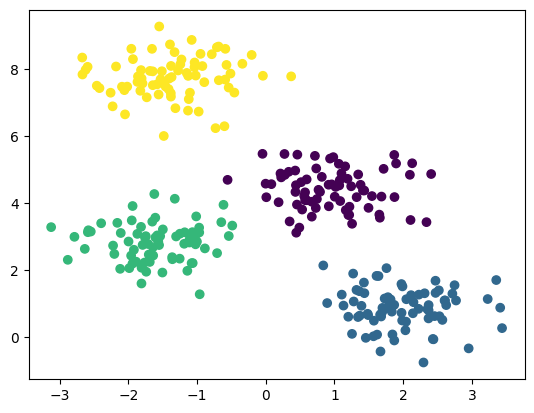

In [69]:
# 1. 데이터 만들기
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# DATA 1: 합성데이터(Synthetic Data)
X, Y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# centers: center의 개수
# cluster_std: standard variation
plt.scatter(X[:,0],X[:,1], c=Y)
# c: 정답 라벨에 따라 색칠

- KMeans API 호출
  - n_clusters: 군집의 개수 K
  - random_state: 초기값 선정에 영향을 줌

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


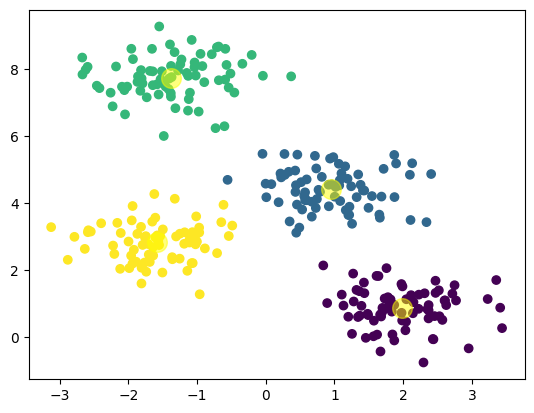

In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

Y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=Y_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='Yellow', s=200, alpha=0.5)

## 1) KMeans 군집화 2
- 데이터셋: 합성 데이터
  - train, test 데이터: X
  - train, test 데이터 라벨: Y

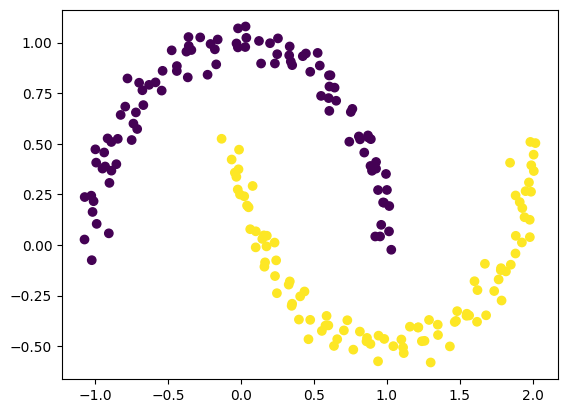

In [73]:
# 1. 데이터 만들기
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X,Y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1], c=Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


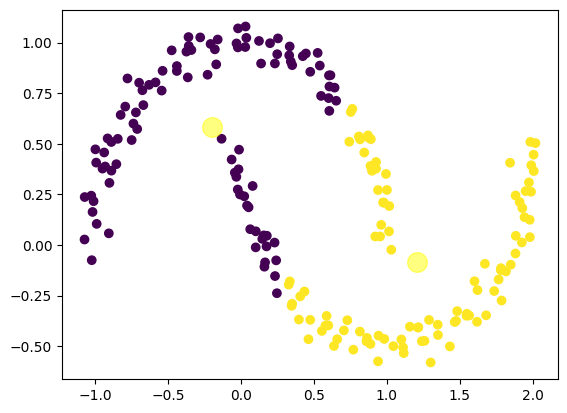

In [76]:
from sklearn.cluster import KMeans

# 학습
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

# 테스트
Y_pred = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=Y_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='Yellow', s=200, alpha=0.5)

## 1) KMeans 군집화 2
- 데이터셋: 손글씨 데이터(digits)
  - train, test 데이터: X
  - train, test 데이터 라벨: Y

In [77]:
# 1. 데이터 만들기
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
Y = digits.target

print(digits.data.shape)
print(digits.target)

(1797, 64)
[0 1 2 ... 8 9 8]


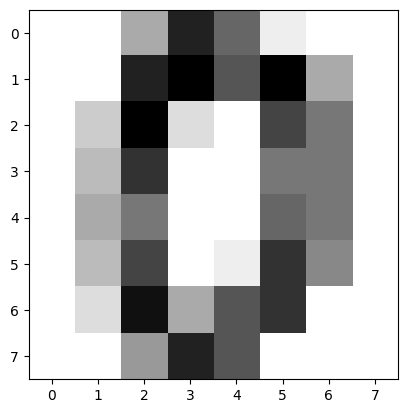

In [88]:
img = digits.data.reshape(1797,8,8)
plt.imshow(img[0], cmap=plt.cm.binary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


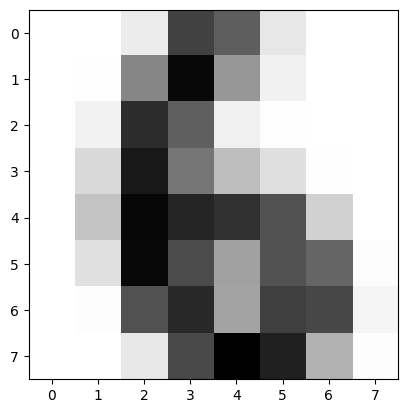

In [80]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

centers = kmeans.cluster_centers_.reshape(10,8,8)
plt.imshow(centers[0], cmap=plt.cm.binary)

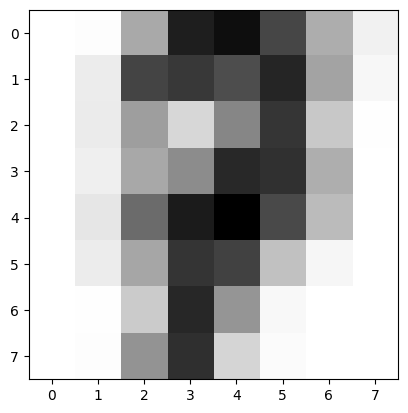

In [84]:
plt.imshow(centers[2], cmap=plt.cm.binary)

# [13주차] PCA 실습
## 1) PCA 
- 데이터셋: 와인 데이터
  - train, test 데이터: X
  - train, test 데이터 라벨: Y

In [89]:
# 1. 데이터 로드
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset.data
Y = dataset.target

# 2. 데이터 분할 - train/test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=1)

# 3. 데이터 정규화
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [90]:
# 4. 데이터 차원 축소
from sklearn.decomposition import PCA

lpca = PCA(n_components=4)
X_train_pca = lpca.fit_transform(X_train_std)
X_test_pca = lpca.transform(X_test_std)

# 5. 모델 학습
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_pca,Y_train)
Y_train_pred = lr.predict(X_train_pca)
Y_test_pred = lr.predict(X_test_pca)

from sklearn import metrics
print(metrics.accuracy_score(Y_train, Y_train_pred))
print(metrics.accuracy_score(Y_test, Y_test_pred))

0.9758064516129032
0.9629629629629629


### PCA 주축의 수 결정법

Eigenvalues 
[4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


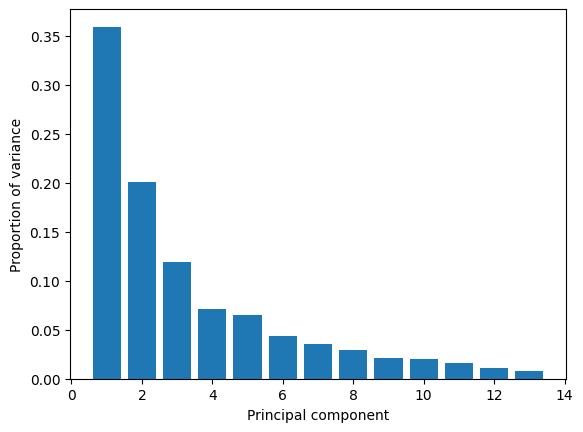

In [92]:
# PCA 주축 개수 구하기 위한 분석
# covariance
import numpy as np
scov = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(scov)
print('Eigenvalues \n%s' %eigen_vals)

# Explained variance ratio
total = sum(eigen_vals)
var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp)
plt.ylabel('Proportion of variance')
plt.xlabel('Principal component')
plt.show()